# Terminal currents

The stream function $g(\vec{r})=g(x, y)$ and supercurrent density $\vec{J}(x, y)$ are related according to $\vec{J}=\vec{\nabla}\times(g\hat{z})=(\partial g/\partial y, -\partial g/\partial x)$. For some assumed supercurrent distribution $\vec{J}$, the associated stream function $g$ is given by $g(\vec{r})=g(\vec{r}_0) + \int_{\vec{r}_0}^\vec{r}(\hat{z}\times\vec{J})\cdot\mathrm{d}\vec{\ell}$, where $\hat{z}\times\vec{J}=(-J_y, J_x)$.

We make the following assumptions regarding terminal currents:

1. The current density $|\vec{J}|$ is uniformly distributed along the terminal.
2. Current direction $\vec{J}/|\vec{J}|$ is everywhere perpendicular to the terminal direction.

In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

import superscreen as sc

In [2]:
device = sc.TransportDevice(
    "bar",
    layer=sc.Layer("base", Lambda=0, z0=0),
    film=sc.Polygon("film", layer="base", points=sc.geometry.box(10)),
    source_terminals=[sc.Polygon("source", points=sc.geometry.box(9.5, 0.1, center=(0, -5)))],
    drain_terminals=[sc.Polygon("drain", points=sc.geometry.box(9.5, 0.1, center=(0, 5)))],
)

In [3]:
terminal_currents = {
    "source": 10,
    "drain": 10,
}

In [20]:
device.make_mesh(min_points=2000)

In [21]:
solution = sc.solve(
    device,
    applied_field=sc.sources.ConstantField(0),
    terminal_currents=terminal_currents,
    current_units="uA",
    field_units="uT",
)[-1]

<IPython.core.display.Javascript object>


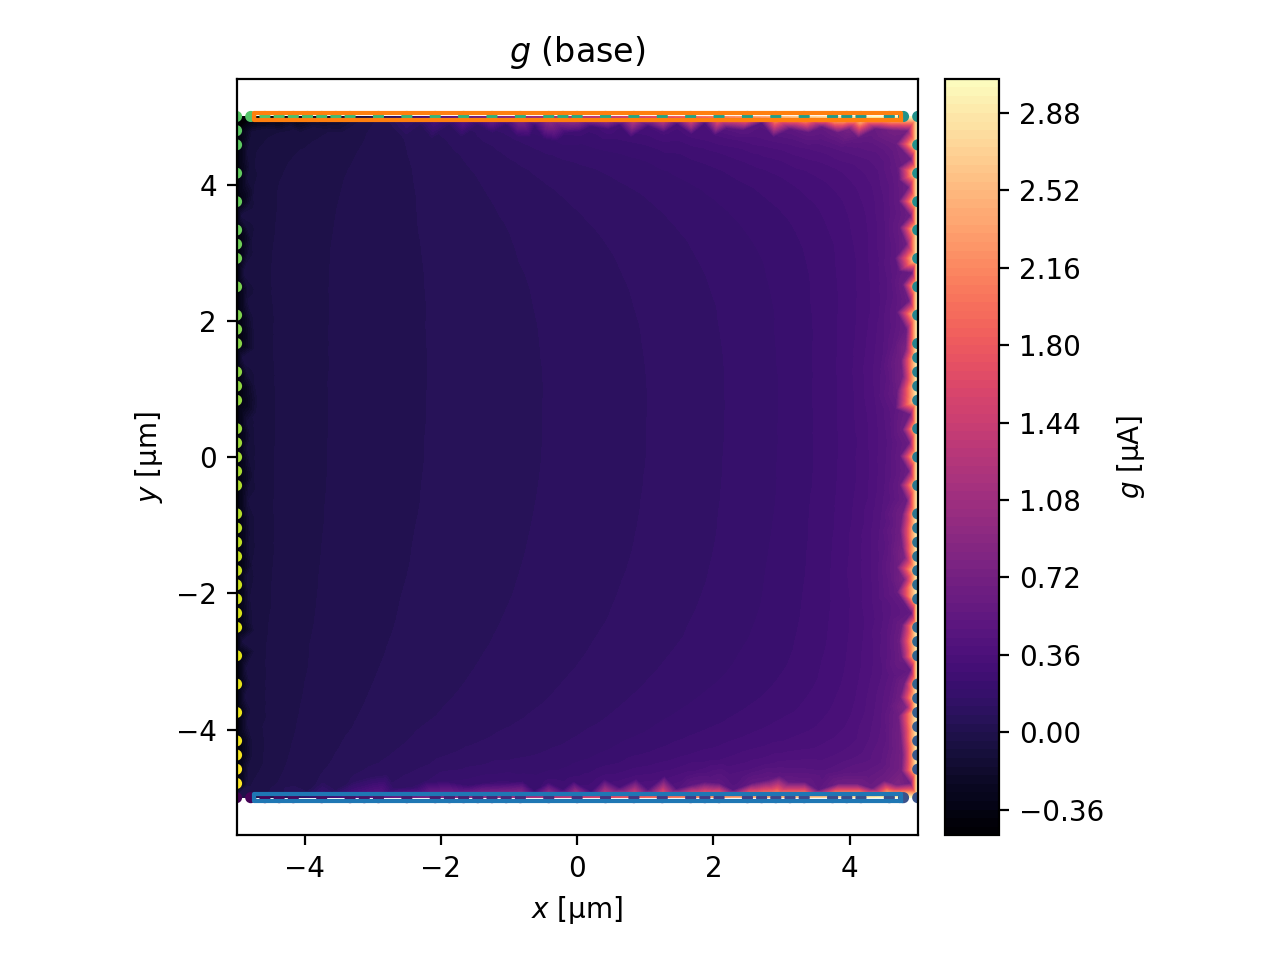

In [24]:
# fig, axes = solution.plot_currents(streamplot=True)
fig, axes = solution.plot_streams()

ix = device.boundary_vertices
colors = plt.get_cmap("viridis")(np.linspace(0, 1, len(ix)))
for ax in axes:
    ax.scatter(*device.points[ix].T, c=colors, marker=".")
    for term in device.source_terminals + device.drain_terminals:
        term.plot(ax=ax)

<IPython.core.display.Javascript object>


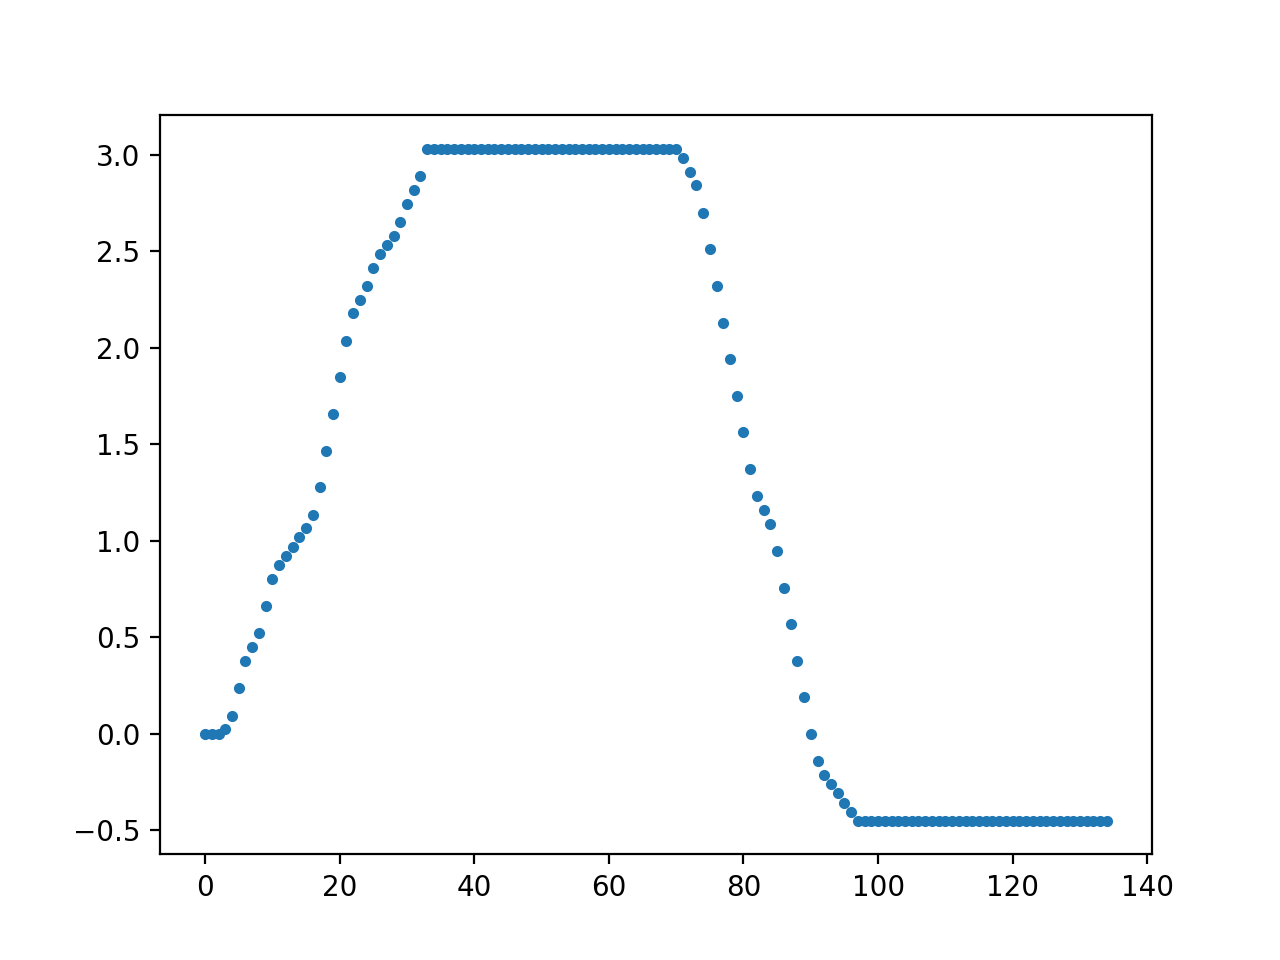

In [25]:
fig, ax = plt.subplots()
ax.plot(np.arange(ix.shape[0]), solution.streams["base"][ix], ".")

In [ ]:
ix = device.boundary_vertices

In [ ]:
ix

In [ ]:
from matplotlib.tri import Triangulation
from shapely.geometry import MultiLineString
from shapely.geometry.polygon import orient
from shapely.ops import polygonize

In [ ]:
points = device.points
triangles = device.triangles

In [ ]:
fig, ax = plt.subplots()
ax.plot(*device.poly_points.T, ".-")

In [ ]:
tri = Triangulation(points[:, 0], points[:, 1], triangles)
boundary_edges = set()
for i, neighbors in enumerate(tri.neighbors):
    for k in range(3):
        if neighbors[k] == -1:
            boundary_edges.add((triangles[i, k], triangles[i, (k + 1) % 3]))
edges = MultiLineString([points[edge, :] for edge in boundary_edges])
polygons = list(polygonize(edges))

In [ ]:
edges

In [ ]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
colors = plt.get_cmap("viridis")(np.linspace(0, 1, len(boundary_edges)))
for b, color in zip(boundary_edges, colors):
    ax.plot(*points[b, :].T, ".-", color=color)